# Aim:
    For this project we look into two sections at solar power park located in Karnataka India gathered over the course of 32 days from the 15th of May to the 17th of June this past summer, https://www.kaggle.com/anikannal/solar-power-generation-data
    
    The data is split into two components for each section. First we have power generation data for each section at the level of individual inverters. Information such as DC_POWER, AC_POWER, total and daily yields are recorded every 15 minutes throughout the day. The second component provides us with climatic information on the station level, a single 'optimally' placed weather station records ambient and module temperatures, as well as irradaiation(irradiance? possibly measured in W/m^2). 
    
    
    Using this information we set out to answer the same questions posed by the author:
    
    a: Is it possible to predict the power generation for the next few days? With the hope of allowing for better grid management/optimization.
    
    b: Can we detect the need for pannel cleaning/maintenance?
    
    c: Can we identify faulty/suboptimally performing equipment?
    
    

# First look:
    We begin looking into the data for each station and how their descriptions compare.


In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from shared_funcs import clean_time1, clean_time2, inverter_comp, inverter_comp_alt
import shap


df_gen1 = pd.read_csv('Plant_1_Generation_Data.csv')
df_wea1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

df_gen2 = pd.read_csv('Plant_2_Generation_Data.csv')
df_wea2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [2]:
df_gen1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [3]:
df_gen2.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [4]:
df_wea1.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [5]:
df_wea2.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [6]:
df_gen1.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [7]:
df_gen2.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [8]:
df_wea1.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [9]:
df_wea2.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

# At first glance:
    We see that power station 1 has a different date formatting than the rest, easy enough to handle. The most important observation to make is that power station 1 has a recorded max value for DC_POWER that is roughly a factor of 10 higher than power station 2. This could imply one of two things: 
### a)
    power station 1 loses roughly 90% of it's energy when converting to AC power.
###   b)
    The instruments at power station 1 are recording incorrectly.
    
    Looking at the total yield for each station we see that station 2 has 1e3 times more production generally implying it is an older installation and components are more likely to have degraded, be dirty, or be malfunctioning. Furthermore, we see that the mean values for daily yeild and ac_power are nearly identical. The % loss from DC to AC conversion at station 2 is much more reasonable at ~2.5%. Thus we assume that there is instrument error in recording DC_POWER at station 1, and should be scaled appropriately. 
    
    It is worth mentioning that these data sets are relatively straightforward and require minimal cleaning and manipulation.
    
    Also briefly looking at the weather data we see minor deviations in ambient temperature and module temperature which suggest several possibilities as well:
### a)
    The geography of the two locations is slightly different
### b) 
    The equipment at station 2 is older and artificially increasing temperature at it's location.
    
    The metrics of import thus far are AC,DC power, Daily yield. We cannot neglect to account for the weather information that has been recorded for each station. This has the potential for telling us so much about the behavior and condition of each inverter/the solar panels attached to each inverter.

In [10]:
df_gen1['DC_POWER'] = df_gen1['DC_POWER']/10 #rescaling of data
df_gen1 = clean_time1(df_gen1,'DATE_TIME')
df_wea1 = clean_time2(df_wea1,'DATE_TIME').drop(['SOURCE_KEY'],axis=1)
result1 = pd.merge(df_gen1, df_wea1, how='outer', on=['DATE_TIME','DATE','HOUR','MINUTE']).dropna()
result1

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1     2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2     2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3     2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4     2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                   ...              ...       ...       ...          ...   
68773 2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
68774 2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
68775 2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
68776 2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
68777 2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       TOTAL_YIELD        DATE  HOUR  MINUTE  AMBIENT_TEMPERATURE  \
0        6259559.0  2020-05-15     0       0            25.184316   
1        6183645.0  2020-05-15     0       0            25.184316   
2        6987759.0  2020-05-15     0       0            25.184316   
3        7602960.0  2020-05-15     0       0            25.184316   
4        7158964.0  2020-05-15     0       0            25.184316   
...            ...         ...   ...     ...                  ...   
68773    7287002.0  2020-06-17    23      45            21.909288   
68774    7028601.0  2020-06-17    23      45            21.909288   
68775    7251204.0  2020-06-17    23      45            21.909288   
68776    6583369.0  2020-06-17    23      45            21.909288   
68777    7363272.0  2020-06-17    23      45            21.909288   

       MODULE_TEMPERATURE  IRRADIATION  
0               22.857507          0.0  
1               22.857507          0.0  
2               22.857507          0.0  
3               22.857507          0.0  
4               22.857507          0.0  
...                   ...          ...  
68773           20.427972          0.0  
68774           20.427972          0.0  
68775           20.427972          0.0  
68776           20.427972          0.0  
68777           20.427972          0.0  

[68774 rows x 12 columns]

Through the merge we produced and dropped 4 entries, not worried about that at all.

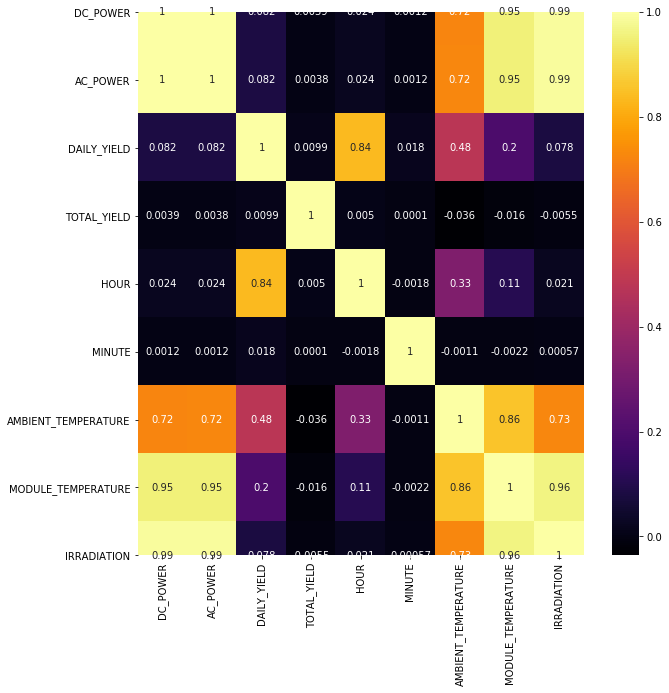

In [11]:
plt.figure(figsize=(10,10))
c1 = result1.corr(method='pearson')
sns.heatmap(c1,cmap='inferno',annot=True)

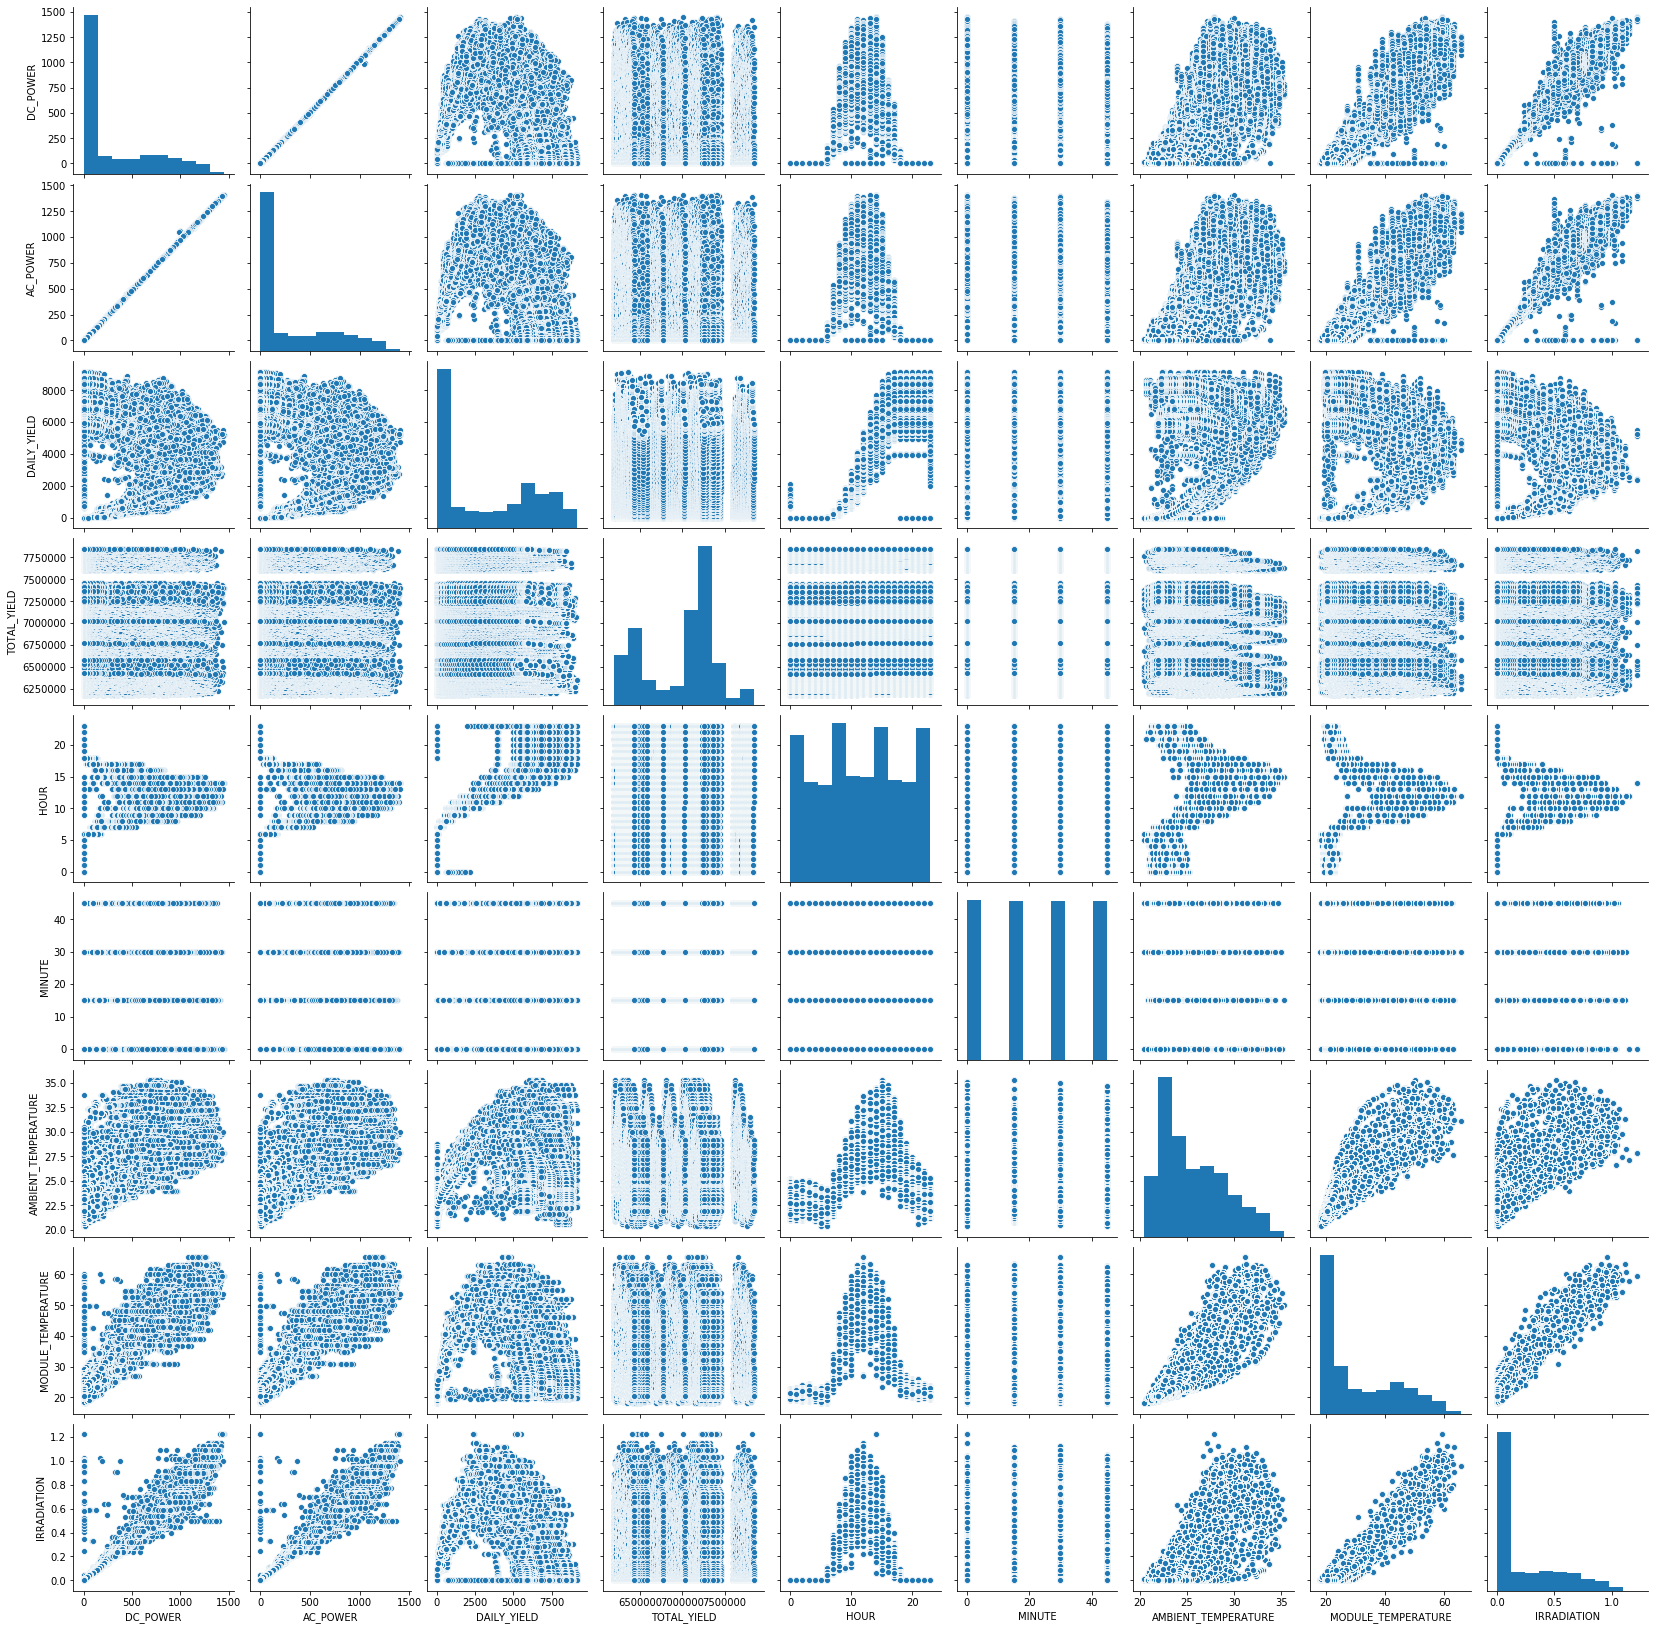

In [12]:
sns.pairplot(data = result1)

In [13]:
df_gen2 = clean_time2(df_gen2, 'DATE_TIME')
df_wea2 = clean_time2(df_wea2,'DATE_TIME').drop(['SOURCE_KEY'],axis=1)
result2 = pd.merge(df_gen2, df_wea2, how='outer', on=['DATE_TIME','DATE','HOUR','MINUTE']).dropna()
result2

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1     2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2     2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3     2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4     2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
...                   ...              ...       ...       ...          ...   
67693 2020-06-17 23:45:00  q49J1IKaHRwDQnt       0.0       0.0  4157.000000   
67694 2020-06-17 23:45:00  rrq4fwE8jgrTyWY       0.0       0.0  3931.000000   
67695 2020-06-17 23:45:00  vOuJvMaM2sgwLmb       0.0       0.0  4322.000000   
67696 2020-06-17 23:45:00  xMbIugepa2P7lBB       0.0       0.0  4218.000000   
67697 2020-06-17 23:45:00  xoJJ8DcxJEcupym       0.0       0.0  4316.000000   

        TOTAL_YIELD        DATE  HOUR  MINUTE  AMBIENT_TEMPERATURE  \
0      2.429011e+06  2020-05-15     0       0            27.004764   
1      1.215279e+09  2020-05-15     0       0            27.004764   
2      2.247720e+09  2020-05-15     0       0            27.004764   
3      1.704250e+06  2020-05-15     0       0            27.004764   
4      1.994153e+07  2020-05-15     0       0            27.004764   
...             ...         ...   ...     ...                  ...   
67693  5.207580e+05  2020-06-17    23      45            23.202871   
67694  1.211314e+08  2020-06-17    23      45            23.202871   
67695  2.427691e+06  2020-06-17    23      45            23.202871   
67696  1.068964e+08  2020-06-17    23      45            23.202871   
67697  2.093357e+08  2020-06-17    23      45            23.202871   

       MODULE_TEMPERATURE  IRRADIATION  
0               25.060789          0.0  
1               25.060789          0.0  
2               25.060789          0.0  
3               25.060789          0.0  
4               25.060789          0.0  
...                   ...          ...  
67693           22.535908          0.0  
67694           22.535908          0.0  
67695           22.535908          0.0  
67696           22.535908          0.0  
67697           22.535908          0.0  

[67698 rows x 12 columns]

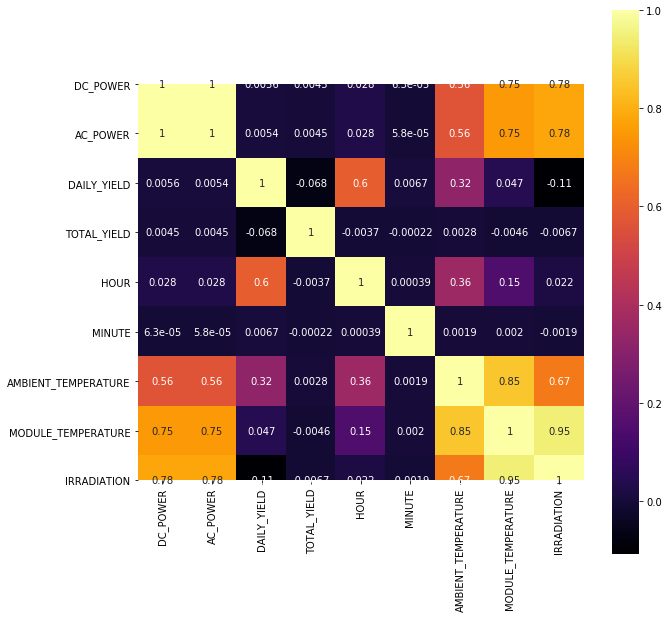

In [14]:
plt.figure(figsize=(10,10))
c2 = result2.corr(method='pearson')
sns.heatmap(c2,cmap='inferno',annot=True,square=True)

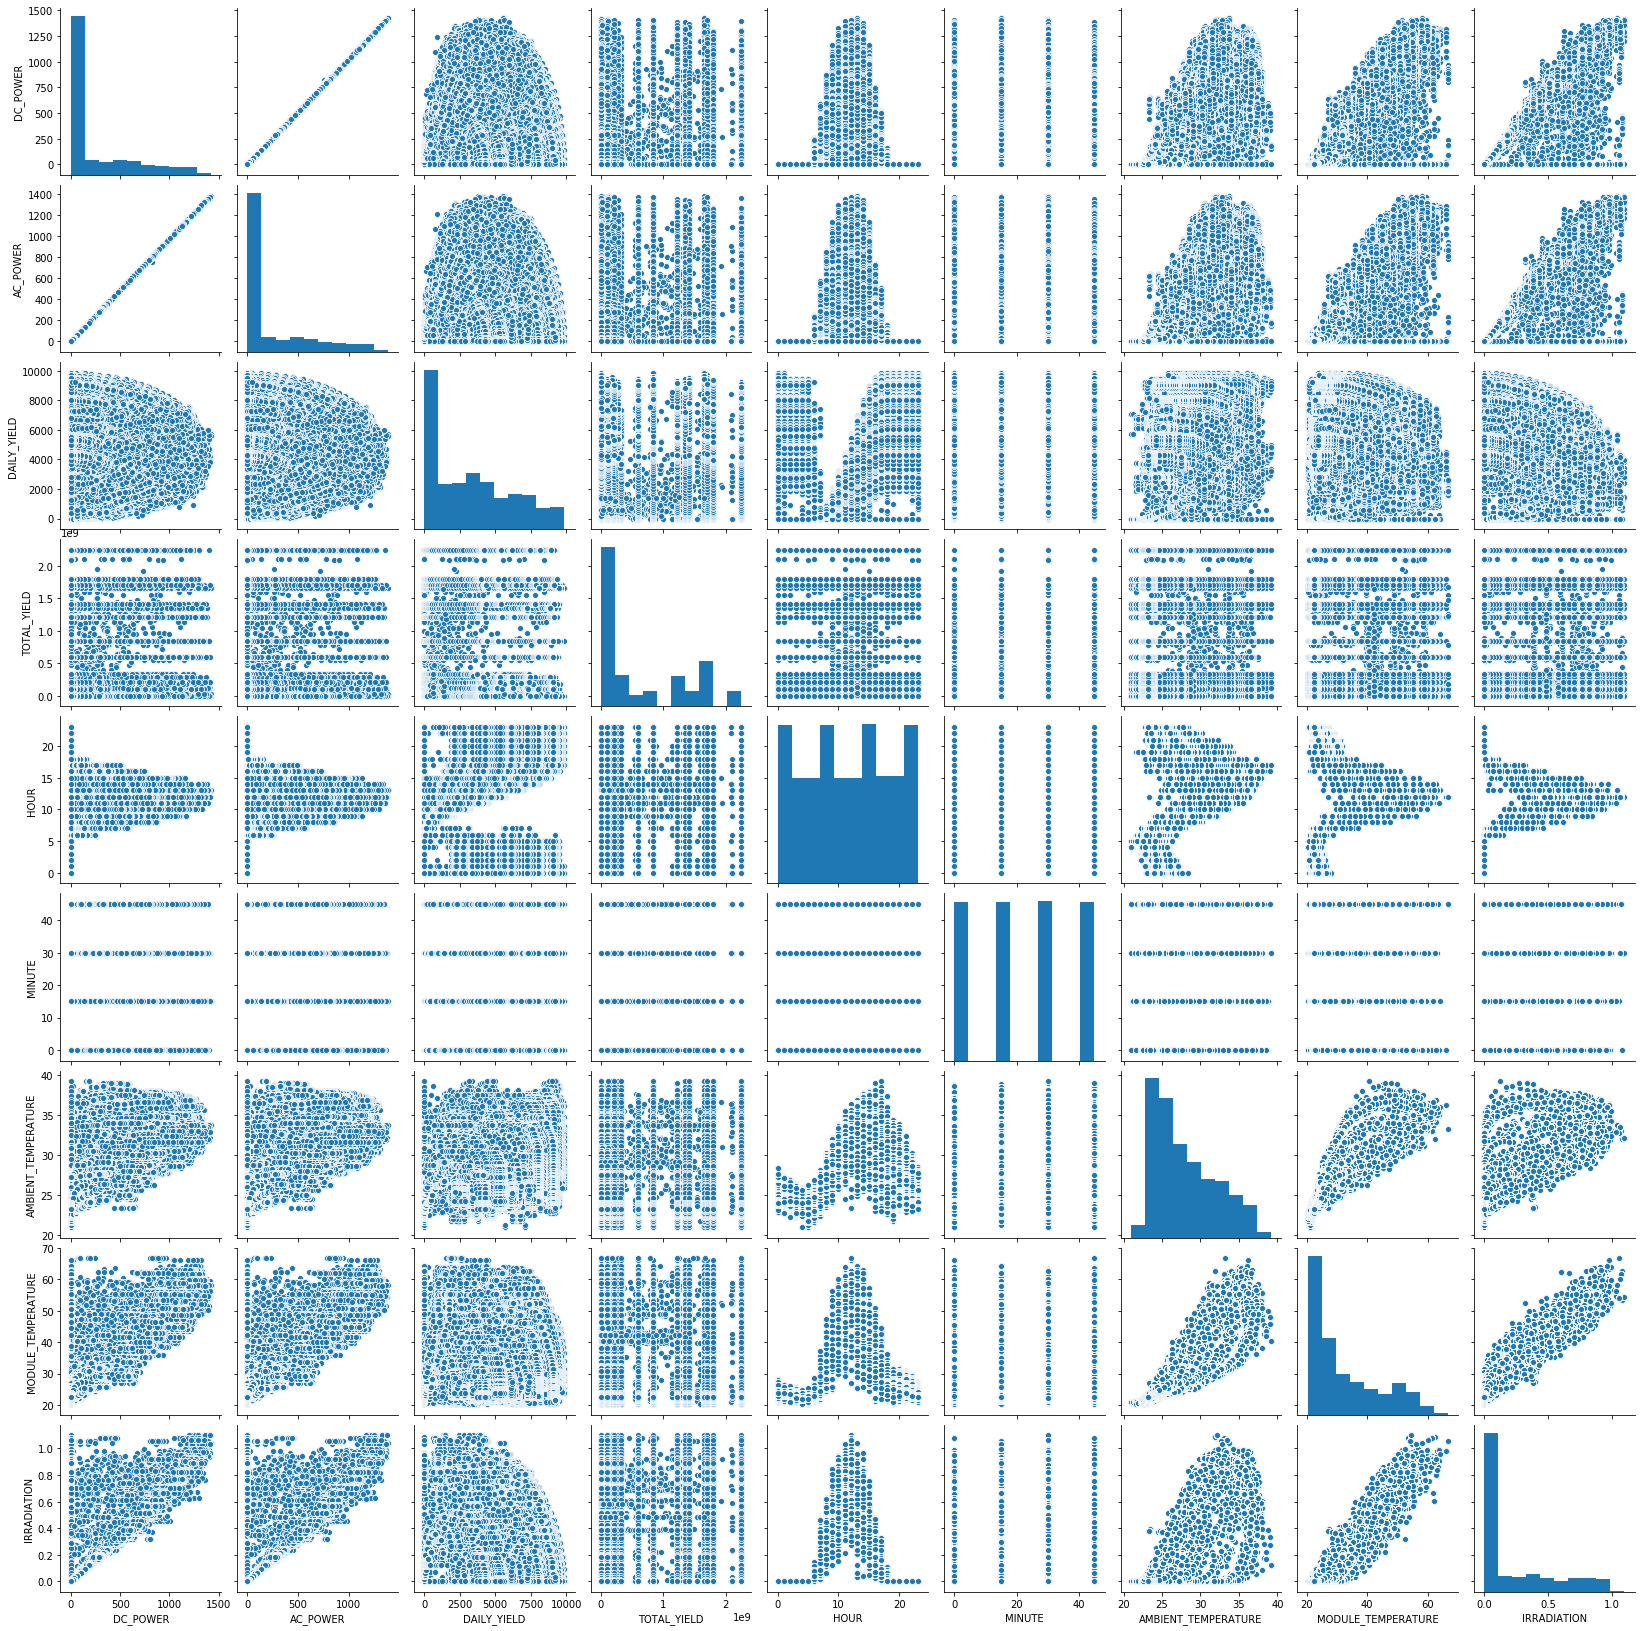

In [15]:
sns.pairplot(data = result2)

Adding the weather data for both of the stations shows that there is strong correlation between IRRADIATION and module temperature, ac power, dc power and ambient temperature. Both stations show these strong correlations, but station 2 has slightly lower values in all feature categories. These are the features that we will be focusing on for the purposes of predicting station/inverter output for management.

The feature we are most likely to predict would be the daily yield for several reasons. First it is the only feature that has a noticeable linear correlation with respect to one of the time based features. Second, it could be possible to use forecasted weather data to determine mean values throughout the day to develop a prediction of the daily yield.

To better inform our efforts in producing said predictions, we are going to do further investigate the daily yield for both stations to understand why there are differences in the correlation. This will perhaps help us to answer the questions regarding identifying faulty or dirty equipment.

In [16]:
gen1_ts = result1.groupby(['DATE_TIME'])['AC_POWER'].agg('mean')
gen2_ts = result2.groupby(['DATE_TIME'])['AC_POWER'].agg('mean')

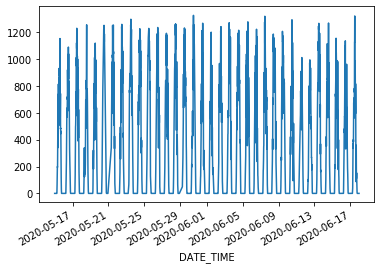

In [17]:
gen1_ts.plot()
plt.show()

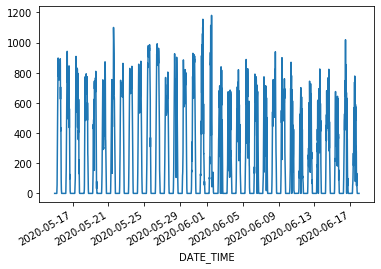

In [18]:
gen2_ts.plot()
plt.show()

Looking at the mean ac_power production of all the inverters at each station elucidates the periodicity in production numbers. Furthermore we see an overall reduction in production values at station 2 with spikes on certain days. This disparity between stations further suggests that there are inverters/panels malfunctioning at station 2.

Here we will beginning investigating and answering the questions of identifying malfunctioning inverters and identifying dirty/suboptimal performance.

## Malfunctioning/Under performing

### Station 1:
    As indicated above, the best measure of a inverter's performance is it's daily yield values. We shall investigate these for each individual inverter to see which if any units show consistent poor performance, or even a slow degradation in performance over time.

In [19]:
gen1_keys = result1.SOURCE_KEY.unique()
date_list1 = result1.DATE.unique()
inverter_data1 = inverter_comp(df_gen1, date_list1, gen1_keys)

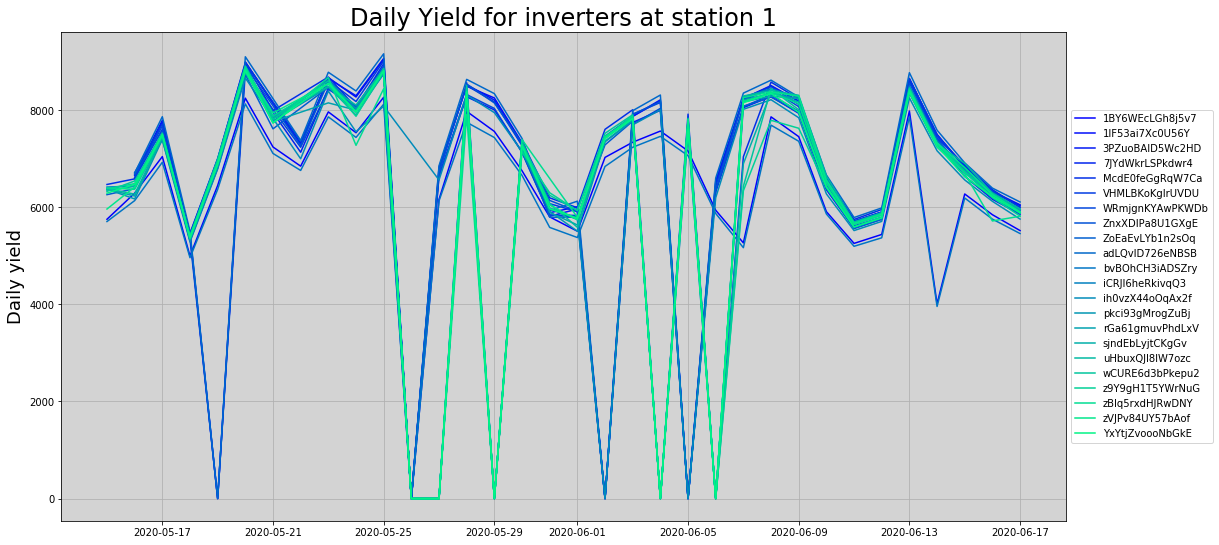

In [20]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen1_keys)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen1_keys:
    df = inverter_data1[inverter_data1['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('Daily Yield for inverters at station 1',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

In [21]:
inverter_data1[(inverter_data1['DAILY_YIELD']<2000)].SOURCE_KEY.value_counts()
reg_malkeys1 = inverter_data1[(inverter_data1['DAILY_YIELD']<2000)].SOURCE_KEY.value_counts().index.tolist()[:12]
reg_malkeys1

['McdE0feGgRqW7Ca',
 'rGa61gmuvPhdLxV',
 'sjndEbLyjtCKgGv',
 'z9Y9gH1T5YWrNuG',
 'zBIq5rxdHJRwDNY',
 'ZoEaEvLYb1n2sOq',
 'pkci93gMrogZuBj',
 'zVJPv84UY57bAof',
 'uHbuxQJl8lW7ozc',
 'iCRJl6heRkivqQ3',
 'wCURE6d3bPkepu2',
 'YxYtjZvoooNbGkE']

Over laying the daily production values for each inverter allows us to get a glimpse at which inverters seem to produce at higher levels compared to others. One interesting thing to note is that throughout the data collection window each inverter registers at least a single day and at max five days with no yield measured. If we consider each inverter reporting five days of no yield to be suspect then 12 of the 22 inverts at this station should be inspected to determine why there is no data reported for those days.

In [22]:
dirty_keys1 = inverter_data1[(inverter_data1['DATE']==date_list1[-4])&(inverter_data1['DAILY_YIELD']<6000)].SOURCE_KEY.unique()
dirty_keys1


array(['1BY6WEcLGh8j5v7', 'bvBOhCH3iADSZry'], dtype=object)

In [23]:
for key in dirty_keys1:
    inverter_data1 = inverter_data1[inverter_data1.SOURCE_KEY!=key]
inverter_data1.head(5)

DATE_TIME       SOURCE_KEY  DAILY_YIELD        DATE  HOUR  MINUTE
1 2020-05-15 20:00:00  McdE0feGgRqW7Ca       6471.0  2020-05-15    20       0
2 2020-05-15 20:00:00  YxYtjZvoooNbGkE       6291.0  2020-05-15    20       0
3 2020-05-15 20:00:00  ZoEaEvLYb1n2sOq       6261.0  2020-05-15    20       0
5 2020-05-15 20:00:00  iCRJl6heRkivqQ3       6418.0  2020-05-15    20       0
6 2020-05-15 20:00:00  pkci93gMrogZuBj       6375.0  2020-05-15    20       0

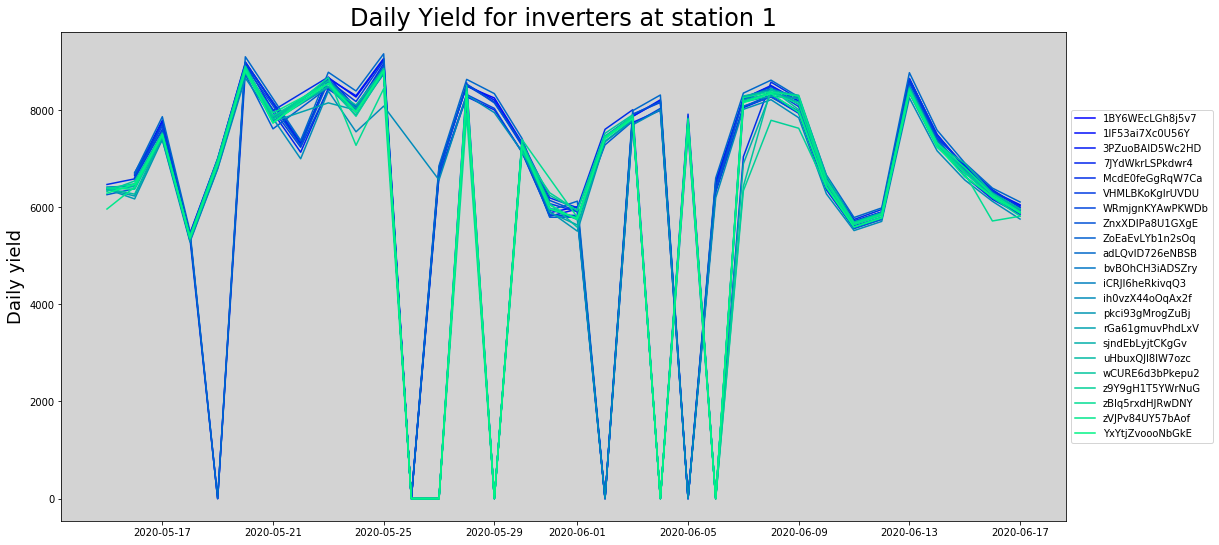

In [24]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen1_keys)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen1_keys:
    df = inverter_data1[inverter_data1['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('Daily Yield for inverters at station 1',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.show()

The inverters that only reported a single day of zero yield regularly produced ~5% less total AC_POWER per day indicating a potential loss to dirty or damaged solar panels in their strings. As for the increased numbers of lost days with the other inverters there are multiple factors that could explain the observed behavior; from inverters shutting off due to high production load, to faulty measurement. At station one it is possible to determine which units appear to malfunction, and which are dirty.

### Station 2:

In [25]:
date_list2 = result2.DATE.unique()
gen2_keys = df_gen2.SOURCE_KEY.unique()
inverter_data2 = inverter_comp(df_gen2, date_list2, gen2_keys)

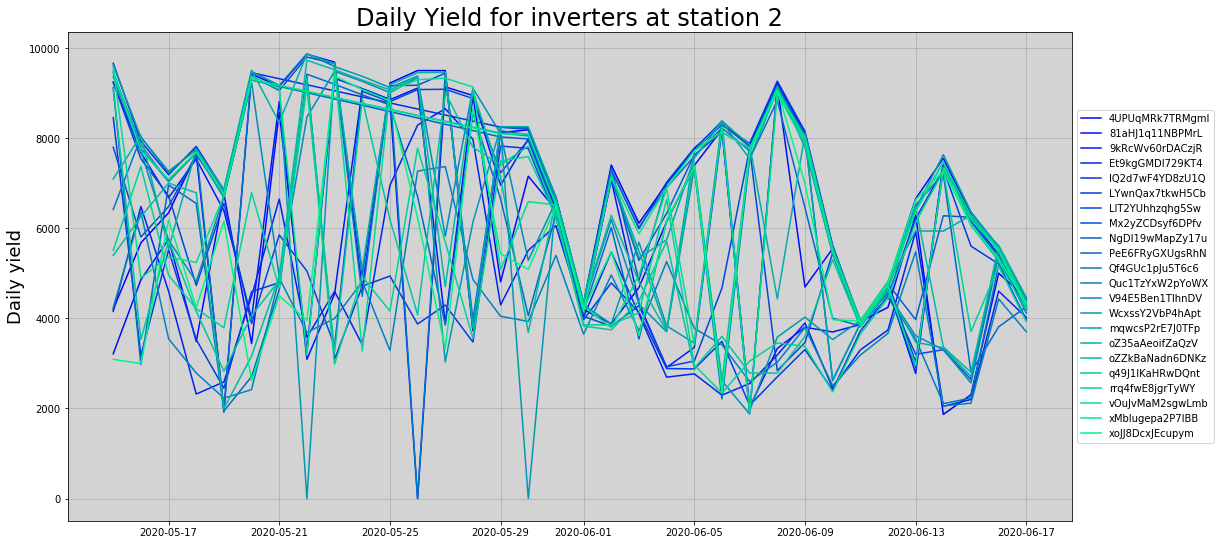

In [26]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen2_keys)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen2_keys:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('Daily Yield for inverters at station 2',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

The variability present in the inverter data for Station 2 further strengthens the assumption that the more aged station would have more faulty/malfunctioning equipment. To get a better sense for how the inverters at this station function we can apply progressive filtering to better examine the data.

In [27]:
low_keys2 = inverter_data2[(inverter_data2.DATE==date_list2[1])&(inverter_data2.DAILY_YIELD <= 5500)].SOURCE_KEY.unique()
hi_keys2 = inverter_data2[(inverter_data2.DATE==date_list2[1])&(inverter_data2.DAILY_YIELD>7500)].SOURCE_KEY.unique()
mid_keys2 = [key for key in gen2_keys if key not in low_keys2 and key not in hi_keys2]

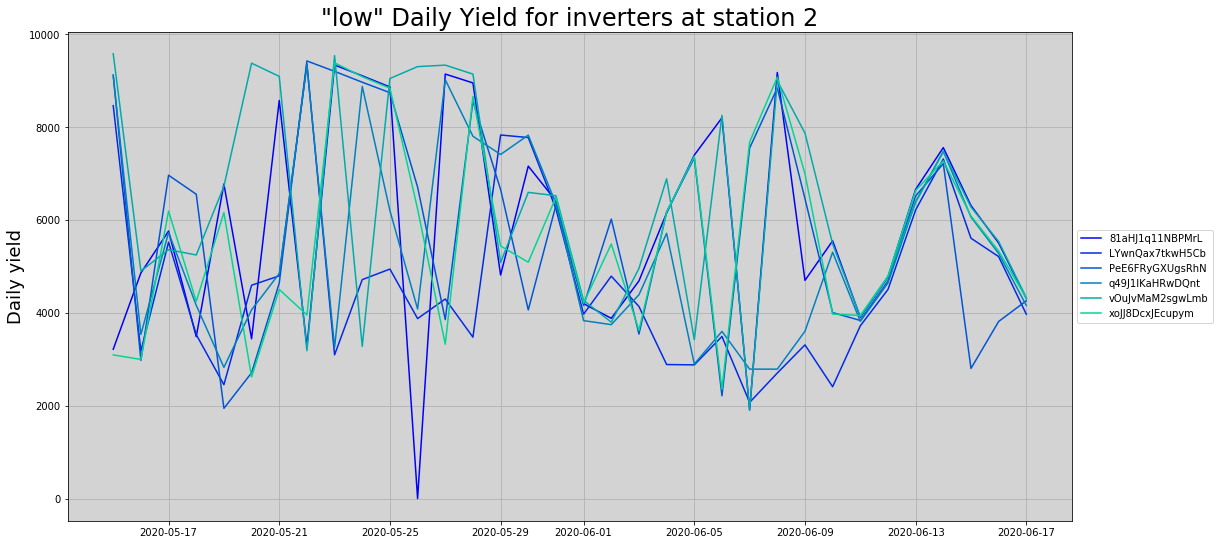

In [28]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(low_keys2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in low_keys2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('"low" Daily Yield for inverters at station 2',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

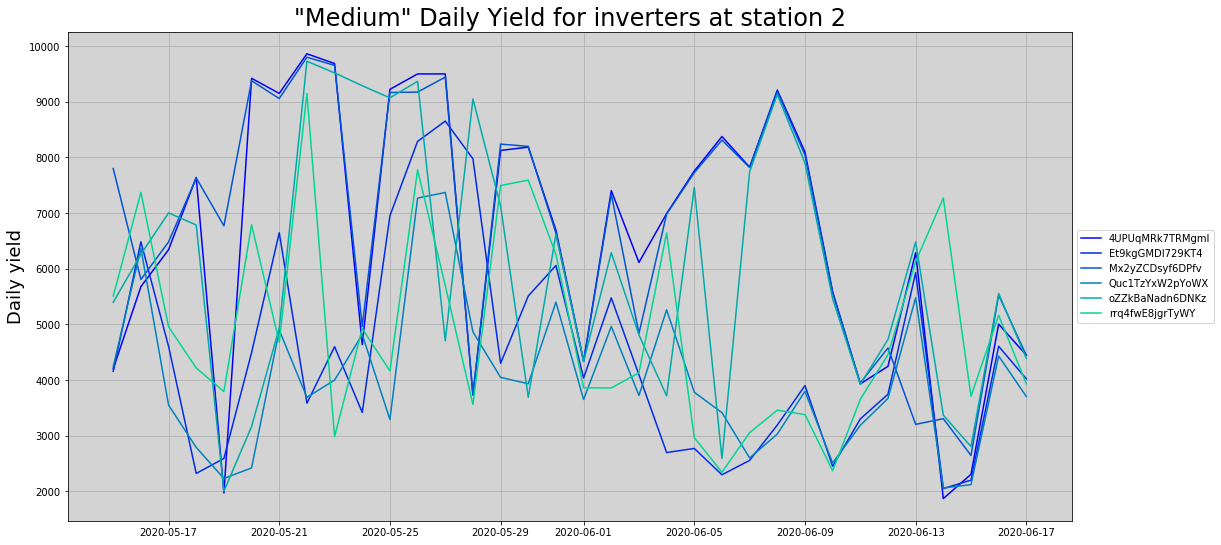

In [29]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(mid_keys2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in mid_keys2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('"Medium" Daily Yield for inverters at station 2',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

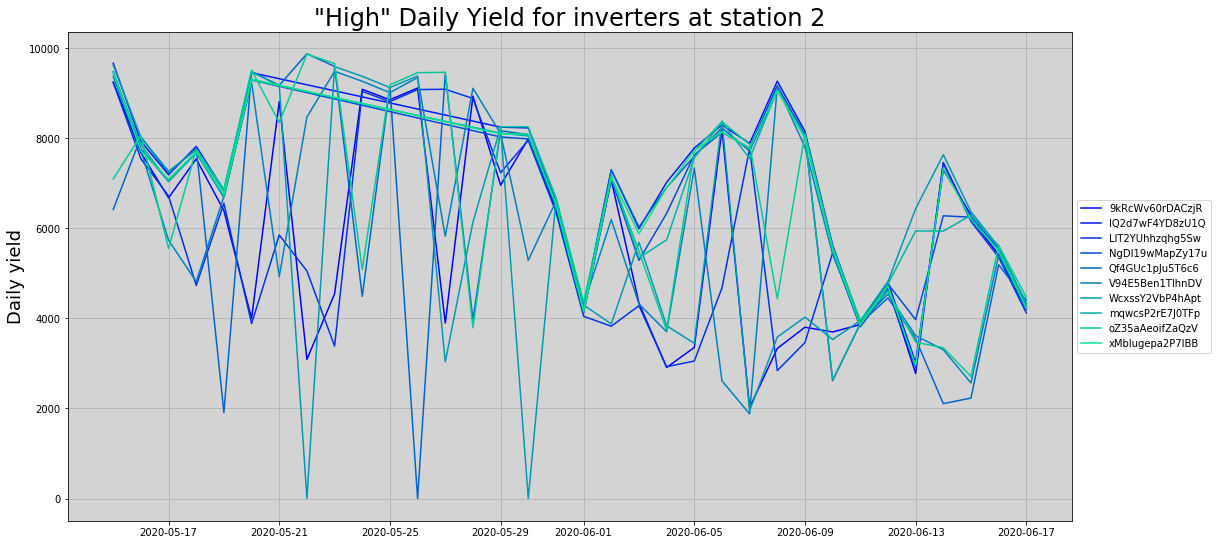

In [30]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(hi_keys2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in hi_keys2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('"High" Daily Yield for inverters at station 2',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

In [31]:
close_look = df_gen2[df_gen2.SOURCE_KEY.isin(hi_keys2)&(df_gen2.HOUR == 21)&(df_gen2.MINUTE==0)].sort_values(by=['SOURCE_KEY'],ascending=True)
better_hi2, missing_keys2 = close_look.SOURCE_KEY.value_counts().index.tolist()[:-4], close_look.SOURCE_KEY.value_counts().index.tolist()[-4:]
missing_keys2


['NgDl19wMapZy17u', 'xMbIugepa2P7lBB', 'mqwcsP2rE7J0TFp', 'IQ2d7wF4YD8zU1Q']

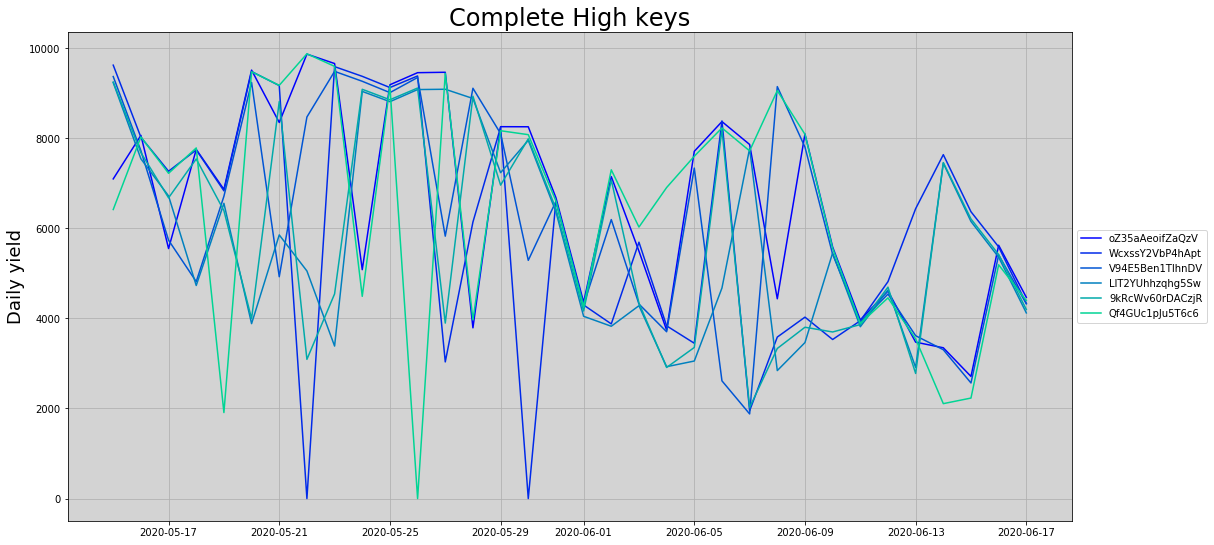

In [32]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(better_hi2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in better_hi2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('Complete High keys',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

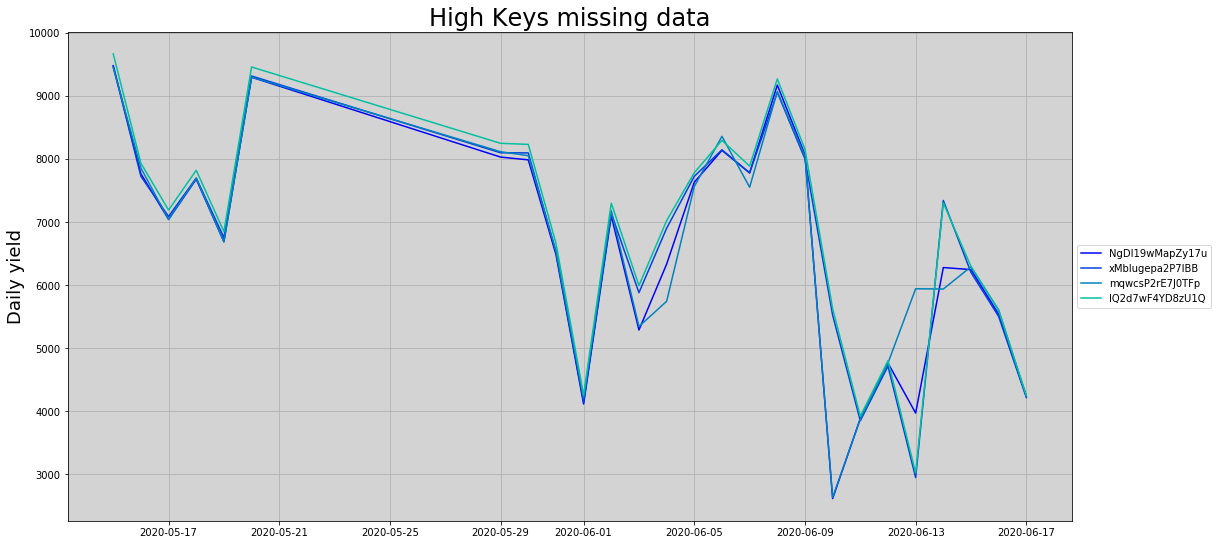

In [33]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(missing_keys2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in missing_keys2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.title('High Keys missing data',fontsize=24)
plt.ylabel('Daily yield', fontsize=18)
plt.grid()
plt.show()

In [34]:
cons_low2 = inverter_data2[(inverter_data2.DATE== date_list2[-9])&(inverter_data2.DAILY_YIELD < 4100)].SOURCE_KEY.unique()
cons_low2

array(['9kRcWv60rDACzjR', 'Et9kgGMDl729KT4', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Quc1TzYxW2pYoWX', 'WcxssY2VbP4hApt',
       'q49J1IKaHRwDQnt', 'rrq4fwE8jgrTyWY'], dtype=object)

In [35]:
keylist2 = [key for key in gen2_keys if key not in cons_low2]
keylist2

['4UPUqMRk7TRMgml',
 '81aHJ1q11NBPMrL',
 'IQ2d7wF4YD8zU1Q',
 'Mx2yZCDsyf6DPfv',
 'NgDl19wMapZy17u',
 'PeE6FRyGXUgsRhN',
 'Qf4GUc1pJu5T6c6',
 'V94E5Ben1TlhnDV',
 'mqwcsP2rE7J0TFp',
 'oZ35aAeoifZaQzV',
 'oZZkBaNadn6DNKz',
 'vOuJvMaM2sgwLmb',
 'xMbIugepa2P7lBB',
 'xoJJ8DcxJEcupym']

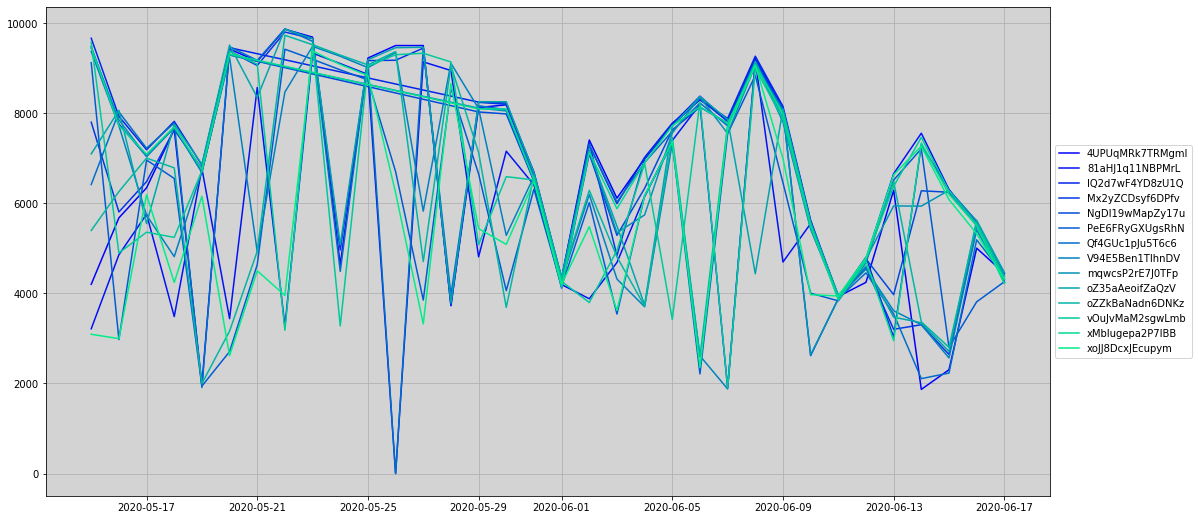

In [36]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(keylist2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in keylist2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.grid()
plt.show()

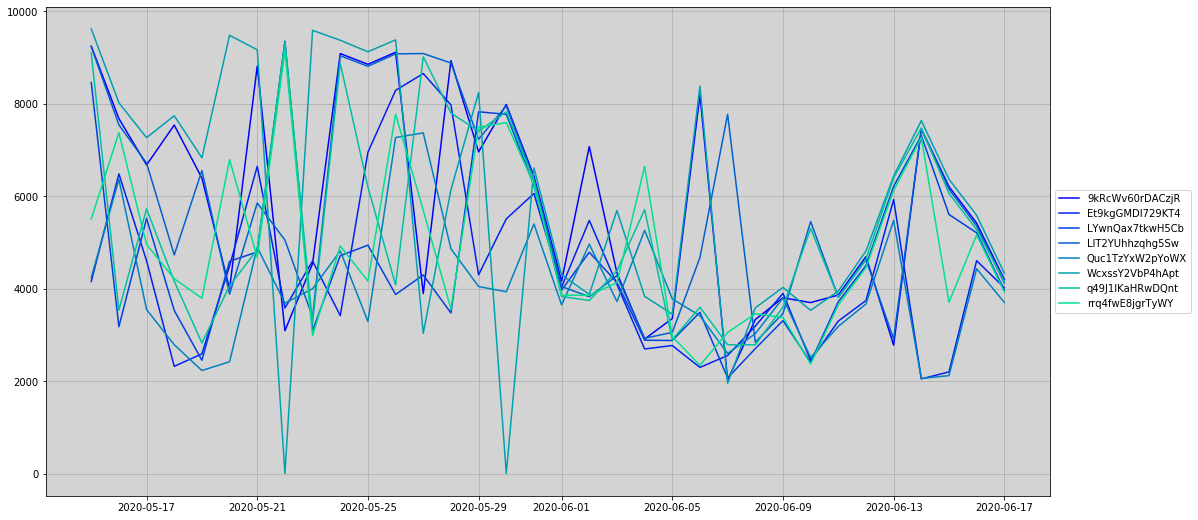

In [37]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(cons_low2)
cm = plt.get_cmap('winter')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in cons_low2:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.grid()
plt.show()

By splitting the data observed for station 2 into three subjective groups based on yield for the second day and then a further regrouping of these into a further two groups a patter begins to develop. After the first of June the observed daily yield for eight inverters develops a trend of remaining consistently low, which is further amplified by the decreased variation in daily yield values after June first.

For the remaining inverters there is a decrease after the first of June but to a lesser extent, and with a maintained level of daily variation as observed before and after this date. 


From the data itself it is possible to identify consistent and emergent trends in the data that suggest faulty or malfunctioning units, as well as whether or not the units are dirty or become dirty over a period of time.